# Exercice 1 - Clustering - Prédiction des nombres

In [2]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.cluster import KMeans

In [3]:
data = load_digits()
X = data['data']

In [4]:
X.shape

(1797, 64)

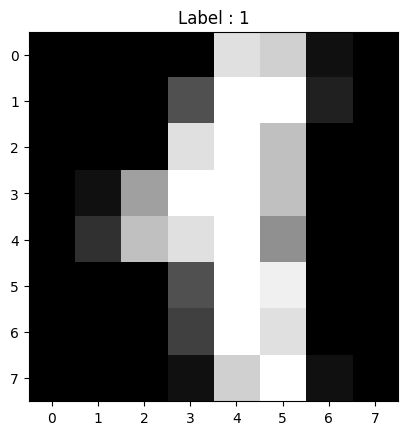

In [5]:
plt.imshow(data.images[11], cmap='gray')
plt.title(f"Label : {data.target[11]}")
plt.show()

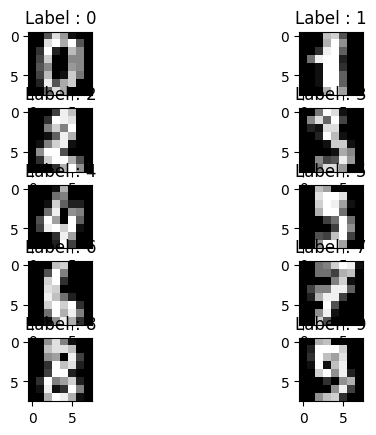

In [6]:
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(data.images[i], cmap='gray')
    plt.title(f"Label : {data.target[i]}")

plt.show()


In [7]:
kmeans = KMeans(n_clusters=10)
kmeans.fit_predict(X)


c:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in _

array([5, 1, 1, ..., 1, 3, 3], shape=(1797,), dtype=int32)

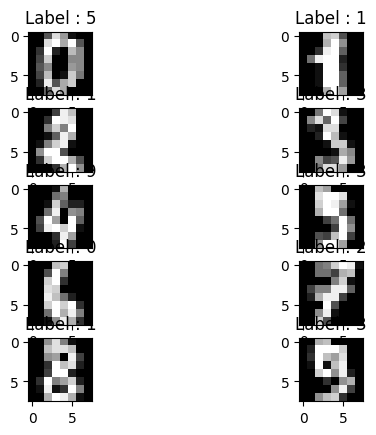

In [8]:
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(data.images[i], cmap='gray')
    plt.title(f"Label : {kmeans.labels_[i]}")

plt.show()

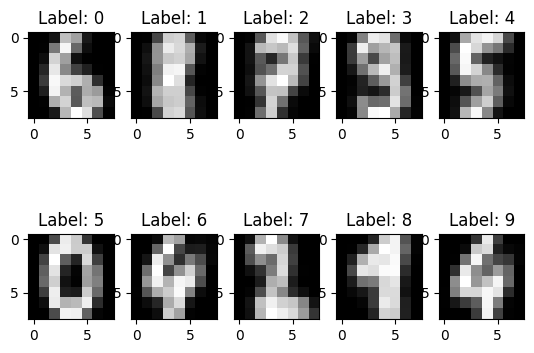

In [9]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(kmeans.cluster_centers_[i].reshape(8,8), cmap='gray')
    plt.title(f"Label: {i}")

plt.show()

# Exercice 2 : Clustering - Recherche du paramètre k optimal


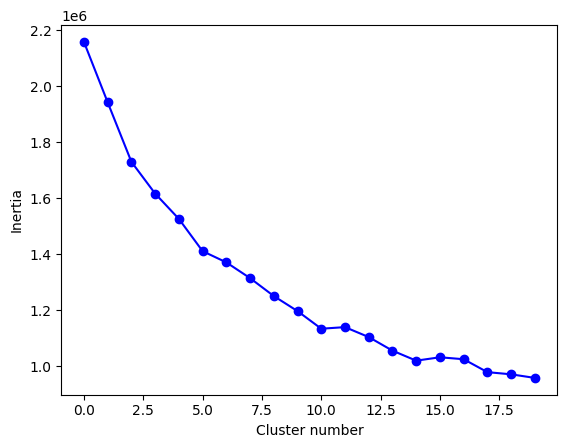

In [10]:
from scipy.spatial.distance import cdist

def get_inertia_plot(dataset, max_cluster):
    inertia_list = []

    for i in range(max_cluster):
        kmeans = KMeans(n_clusters=i+1)
        kmeans.fit_predict(dataset)
        inertia_list.append(kmeans.inertia_)

    plt.figure()
    plt.ylabel('Inertia')
    plt.xlabel('Cluster number')
    plt.plot(inertia_list, 'bo-')

    return inertia_list


inertias = get_inertia_plot(X, 20)



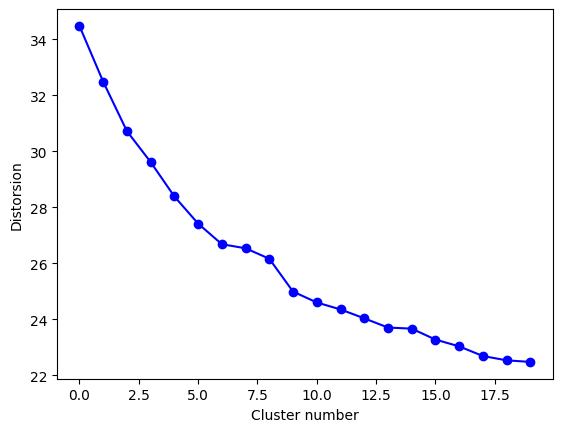

In [11]:
from scipy.spatial.distance import cdist

def get_distorsion_plot(dataset, max_clusters):
    distorsion_list = []

    for i in range(max_clusters):
        kmeans = KMeans(n_clusters=i+1)
        kmeans.fit_predict(dataset)
        distorsion = np.mean(np.min(cdist(dataset, kmeans.cluster_centers_, 'euclidean'), axis=1))
        distorsion_list.append(distorsion)

    plt.figure()
    plt.ylabel('Distorsion')
    plt.xlabel('Cluster number')
    plt.plot(distorsion_list, 'bo-')

    return distorsion_list

distorsions = get_distorsion_plot(X, 20)

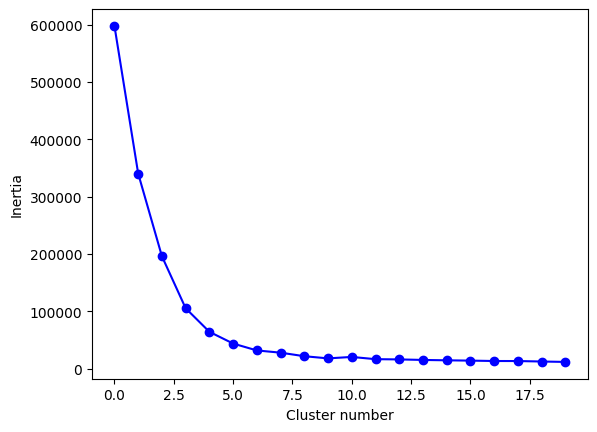

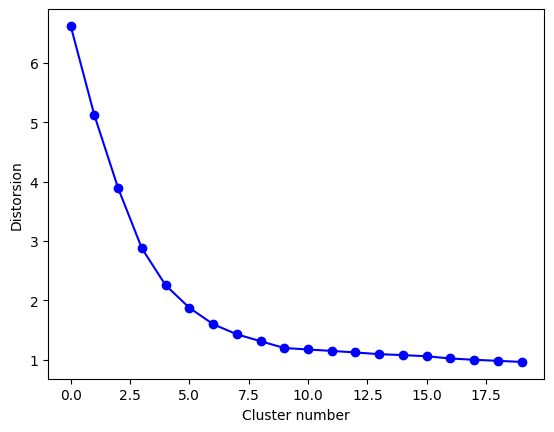

In [12]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=10000, centers=10, n_features=2, random_state=0)

inertias = get_inertia_plot(X, 20)
distorsions = get_distorsion_plot(X, 20)

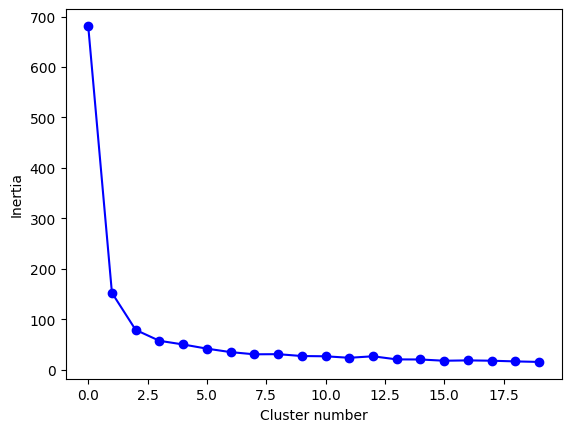

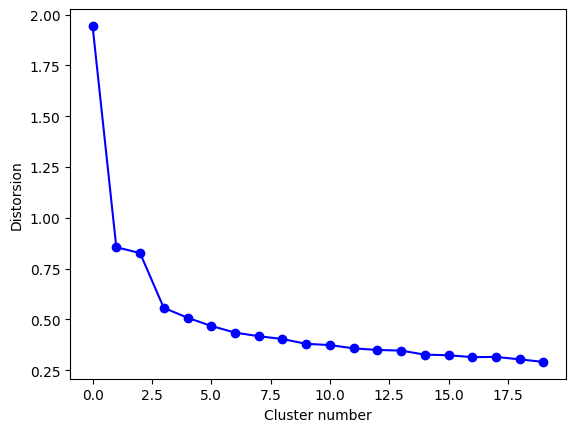

In [13]:
from sklearn.datasets import load_iris

data = load_iris()
X = data['data']

inertias = get_inertia_plot(X, 20)
distorsions = get_distorsion_plot(X, 20)

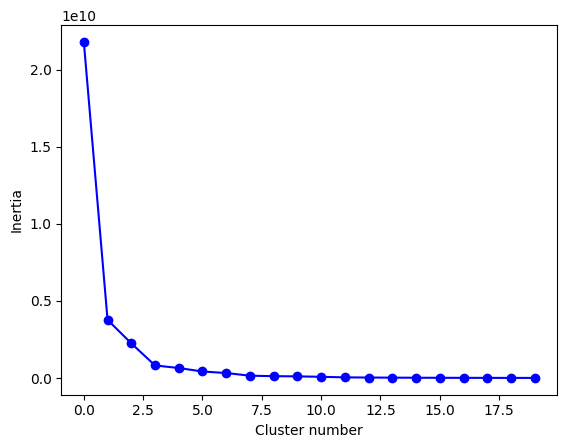

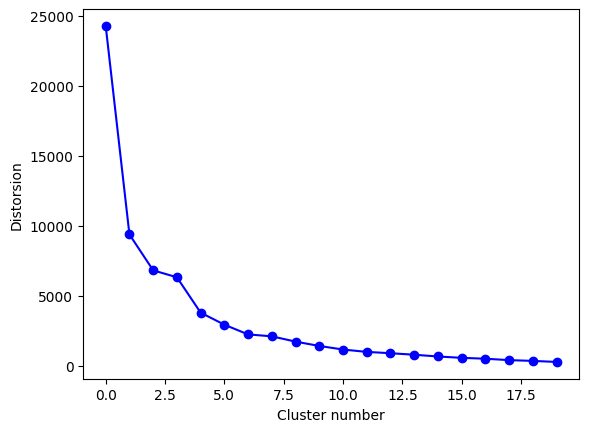

In [14]:
df = pd.read_csv('Salary_Data.csv')

inertias = get_inertia_plot(df, 20)
distorsions = get_distorsion_plot(df, 20)

# Exercice 5 - Clustering - Autres méthodes de clustering

In [15]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=3, n_classes=2, n_clusters_per_class=1, n_redundant=0)


[np.float64(1.6912620101965044),
 np.float64(1.3222641472903194),
 np.float64(1.1768818798458742),
 np.float64(1.0618027551820641),
 np.float64(1.0065487499773034),
 np.float64(0.9364897000446419),
 np.float64(0.8979416612652378),
 np.float64(0.8564714049264283),
 np.float64(0.8272687838830745),
 np.float64(0.8066662199502518),
 np.float64(0.7740899524683164),
 np.float64(0.7521129357718752),
 np.float64(0.7343427838455046),
 np.float64(0.7158251994286647),
 np.float64(0.6998300907603745),
 np.float64(0.6887320419827697),
 np.float64(0.6741321418714267),
 np.float64(0.6576105053696321),
 np.float64(0.6591724688620898),
 np.float64(0.6413884974392068)]

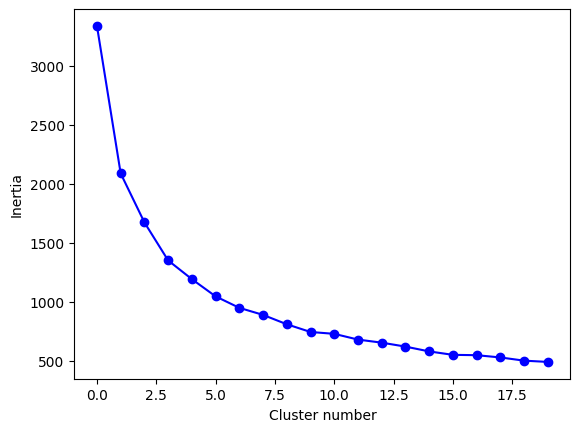

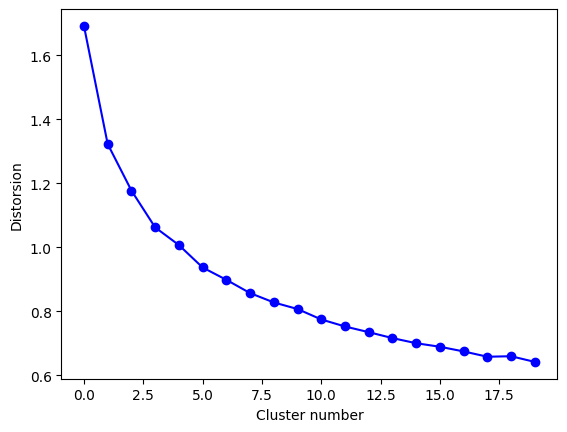

In [16]:
# KMeans
get_inertia_plot(X, 20)
get_distorsion_plot(X, 20)

In [17]:
# DBScan
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score

dbscan = DBSCAN()
dbscan.fit_predict(X)
print(accuracy_score(y, dbscan.labels_))


0.456
